In [31]:
import numpy as np
# initialize the population vector
N = 1.0e6    #population size
SIR = np.zeros((1,3))
SIR[:,0] = N  # initialize the S group with the respective populations                             

In [32]:
first_infections = 1  # for demo purposes, randomly introduce infections
SIR[:, 0] = SIR[:, 0] - first_infections
SIR[:, 1] = SIR[:, 1] + first_infections                           # move infections to the I group

In [33]:
# initialize parameters
beta = 0.205
gamma = 0.0275
R0 = beta/gamma

In [34]:
# make copy of the SIR matrices 
SIR_sim = SIR.copy()

cum_sim = 0

In [35]:
from tqdm import tqdm_notebook

infectedOfT = []
recoveredOfT = []
sceptibleOfT = []
timeSteps = []
cum_i = []


for time_step in tqdm_notebook(range(0,200)):
    new_infect = beta*SIR_sim[:,0]*SIR_sim[:,1]/N
    new_recovered = gamma*SIR_sim[:,1]
    SIR_sim[:, 0] = SIR_sim[:, 0] - new_infect
    SIR_sim[:, 1] = SIR_sim[:, 1] + new_infect - new_recovered
    SIR_sim[:, 2] = SIR_sim[:, 2] + new_recovered
    cum_sim = cum_sim + new_infect
    SIR_sim = np.where(SIR_sim<0,0,SIR_sim)
    S = SIR_sim[:,0]
    I = SIR_sim[:,1]
    R = SIR_sim[:,2] 
    timeSteps.append(time_step)
    infectedOfT.append(I)
    recoveredOfT.append(R)
    sceptibleOfT.append(S)
    cum_i.append(cum_sim)
    

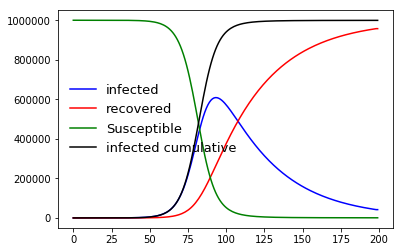

In [37]:
import matplotlib.pyplot as plt

plt.plot(timeSteps,infectedOfT, color = 'b', label = 'infected')
#plt.plot(timeSteps,totalCasesOfT, color = 'c', label = 'total cases')
plt.plot(timeSteps,recoveredOfT, color = 'r', label = 'recovered')
plt.plot(timeSteps,sceptibleOfT, color = 'g', label = 'Susceptible')

#cum_i = np.zeros_like(infectedOfT)
#cum_i[0] = infectedOfT[0]
#for i in np.arange(1,len(infectedOfT)):
    #cum_i[i] = sum(infectedOfT[0:i])
plt.plot(timeSteps, cum_i, color = 'k', label = 'infected cumulative')

plt.legend(loc='best',fontsize=13.0,numpoints=1, frameon=False)